In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [22]:
df = pd.read_csv("Chihuahua_clima.csv", index_col=0)
df = df.rename(columns={"Rs (W/m²)": "Rs(w/m)"})

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,22,4.0,15.8,-5.337960,89.396630
1,2020-04-01 13:10:00,2020,4,1,23,17.0,15.8,-4.812238,87.208510
2,2020-04-01 13:20:00,2020,4,1,23,34.0,16.6,-4.187424,85.017212
3,2020-04-01 13:30:00,2020,4,1,26,47.0,17.0,-2.415345,82.823682
4,2020-04-01 13:40:00,2020,4,1,27,49.0,17.1,-1.884415,80.628862
...,...,...,...,...,...,...,...,...,...
22571,2021-04-01 00:20:00,2021,4,1,10,202.0,25.2,-7.380279,77.286479
22572,2021-04-01 00:30:00,2021,4,1,11,165.0,24.6,-6.747384,79.478675
22573,2021-04-01 00:40:00,2021,4,1,11,128.0,24.1,-7.096539,81.671314
22574,2021-04-01 01:00:00,2021,4,1,13,41.0,22.7,-6.226008,86.054061


In [24]:
norm_df = df.copy()


scalerNorm = MinMaxScaler()
norm_df["Rs(w/m)"] = scalerNorm.fit_transform(norm_df[["Rs(w/m)"]])

std_cols = ["HR (%)", "T Aire (C)", "Td form", "Theta"]
scaler_Std = StandardScaler()
norm_df[std_cols] = scaler_Std.fit_transform(norm_df[std_cols])

norm_df

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,-0.125609,0.002196,-1.167043,-0.805672,1.679868
1,2020-04-01 13:10:00,2020,4,1,-0.062355,0.011713,-1.167043,-0.731814,1.577984
2,2020-04-01 13:20:00,2020,4,1,-0.062355,0.024158,-1.069714,-0.644035,1.475952
3,2020-04-01 13:30:00,2020,4,1,0.127408,0.033675,-1.021050,-0.395078,1.373816
4,2020-04-01 13:40:00,2020,4,1,0.190662,0.035139,-1.008884,-0.320489,1.271620
...,...,...,...,...,...,...,...,...,...
22571,2021-04-01 00:20:00,2021,4,1,-0.884659,0.147145,-0.023430,-1.092594,1.115991
22572,2021-04-01 00:30:00,2021,4,1,-0.821405,0.120059,-0.096426,-1.003680,1.218065
22573,2021-04-01 00:40:00,2021,4,1,-0.821405,0.092972,-0.157257,-1.052732,1.320159
22574,2021-04-01 01:00:00,2021,4,1,-0.694896,0.029283,-0.327582,-0.930432,1.524230


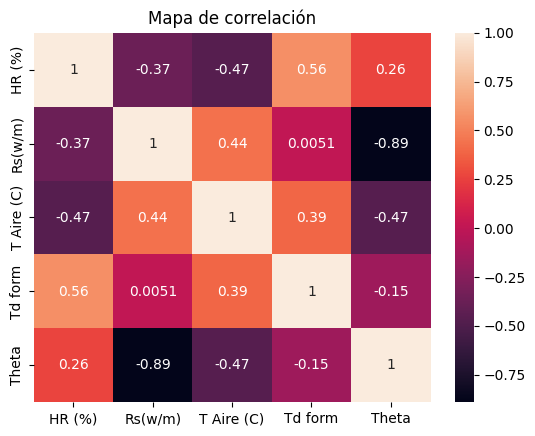

In [25]:
corr_mat = norm_df.loc[:, "HR (%)":].corr()

sns.heatmap(corr_mat, annot=True)
plt.title("Mapa de correlación")
plt.show()

In [26]:
y = df["T Aire (C)"] # Variable objetivo
X = df[["HR (%)"]] #

X.T

,0,1,2,3,4,5,6,7,8,9,...,22566,22567,22568,22569,22570,22571,22572,22573,22574,22575
HR (%),22,23,23,26,27,26,27,28,28,28,...,9,9,9,10,10,10,11,11,13,14


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=614)

print(f'Tamano de training: {X_train.shape[0]}, Tamano de test: {X_test.shape[0]}')

Tamano de training: 18060, Tamano de test: 4516


In [28]:
#Crear modelo de regresion
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Realizar predicciones
y_pred = model.predict(X_test)
print(y_pred.shape[0])

4516


In [30]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Raiz del error cuadratico medio (RMSE): {rmse: .2f}")
print(f"Coeficiente R2: {r2: .2f}")

Raiz del error cuadratico medio (RMSE):  7.36
Coeficiente R2:  0.19


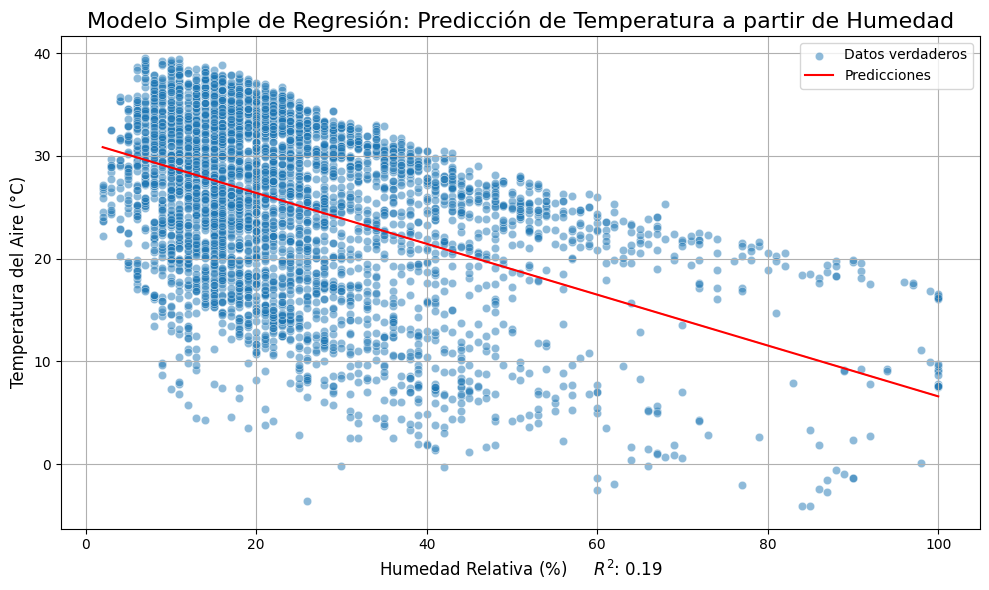

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['HR (%)'], y=y_test, alpha=0.5, label='Datos verdaderos')
sns.lineplot(x=X_test['HR (%)'], y=y_pred, color='red', label='Predicciones')
plt.title('Modelo Simple de Regresión: Predicción de Temperatura a partir de Humedad', fontsize=16)
plt.xlabel(f'Humedad Relativa (%) \t $R^2$: {r2:.2f}', fontsize=12)
plt.ylabel('Temperatura del Aire (°C)', fontsize=12)
plt.legend()
plt.grid(visible=True)
plt.tight_layout()
plt.show()

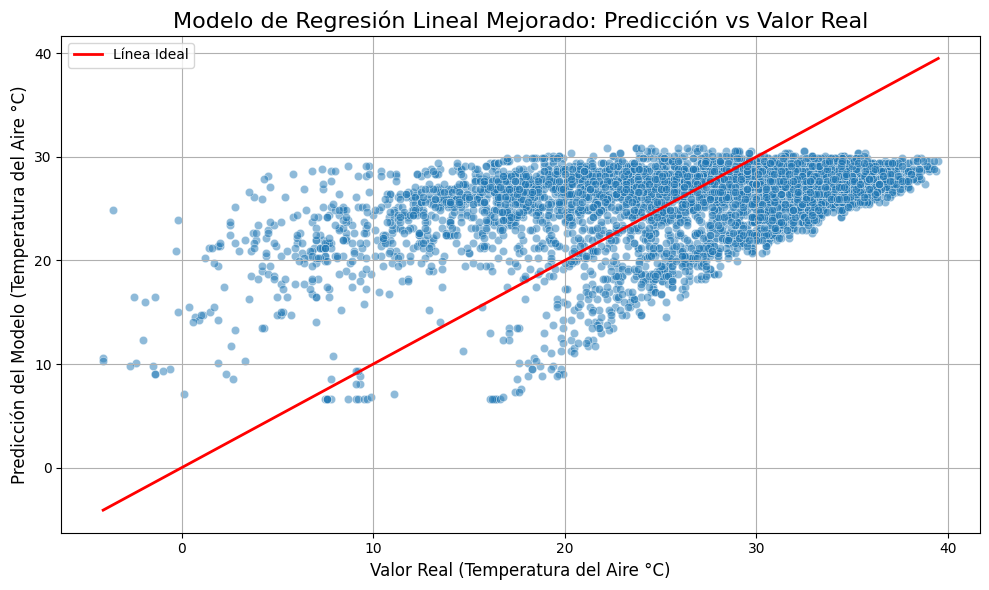

In [34]:
# Graficar los resultados del modelo mejorado
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Línea Ideal')
plt.title('Modelo de Regresión Lineal Mejorado: Predicción vs Valor Real', fontsize=16)
plt.xlabel('Valor Real (Temperatura del Aire °C)', fontsize=12)
plt.ylabel('Predicción del Modelo (Temperatura del Aire °C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
features = ["HR (%)", "Td form", "Rs(w/m)"]
X = df[features]
y = df["T Aire (C)"]
X

,HR (%),Td form,Rs(w/m)
0,22,-5.337960,4.0
1,23,-4.812238,17.0
2,23,-4.187424,34.0
3,26,-2.415345,47.0
4,27,-1.884415,49.0
...,...,...,...
22571,10,-7.380279,202.0
22572,11,-6.747384,165.0
22573,11,-7.096539,128.0
22574,13,-6.226008,41.0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamano de training: {X_train.shape}, Tamano de test: {X_test.shape}")

Tamano de training: (18060, 3), Tamano de test: (4516, 3)


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)
print(y_pred.shape[0])

4516


In [40]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Raiz del error cuadratico medio (RMSE): {rmse: .2f}")
print(f"Coeficiente R2: {r2: .2f}")

Raiz del error cuadratico medio (RMSE):  3.29
Coeficiente R2:  0.84


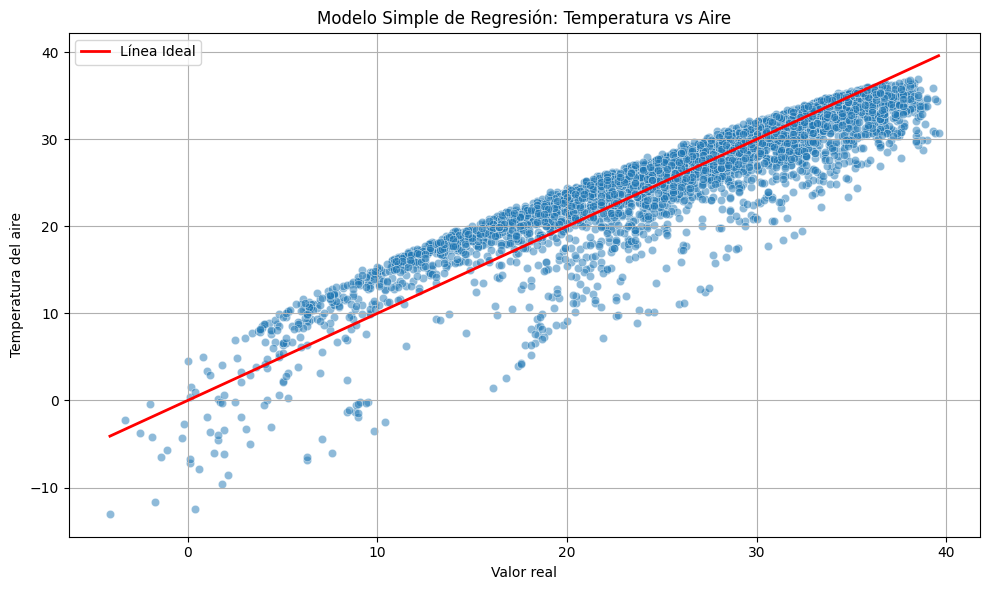

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Línea Ideal')
plt.title("Modelo Simple de Regresión: Temperatura vs Aire")
plt.xlabel(f"Valor real")
plt.ylabel("Temperatura del aire")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

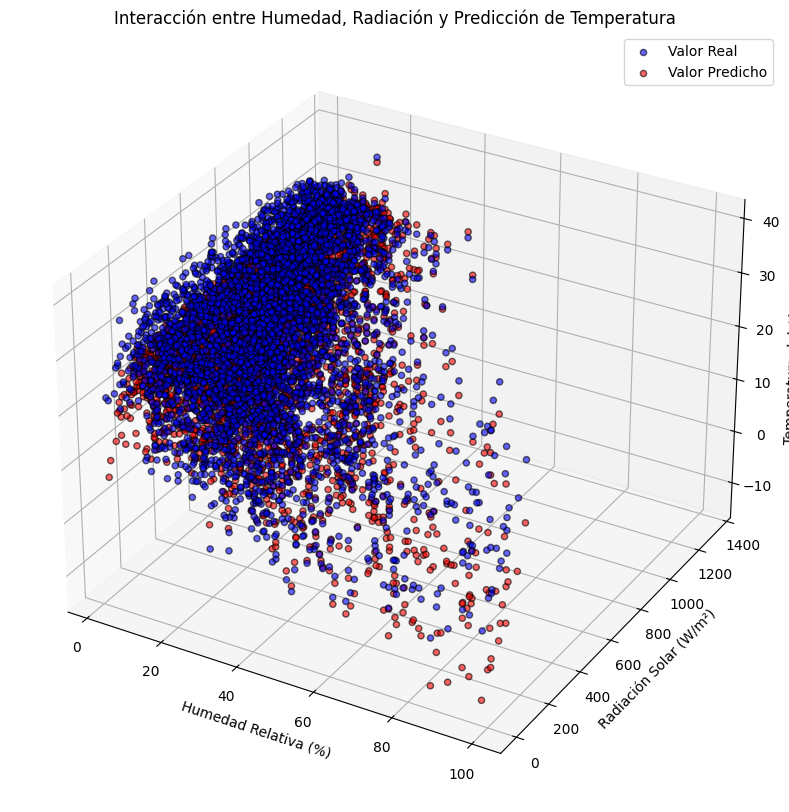

In [42]:
# Graficar los puntos reales y los valores predichos
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test["HR (%)"], X_test["Rs(w/m)"], y_test, color='blue', alpha=0.6, label='Valor Real', edgecolor='k')
ax.scatter(X_test["HR (%)"], X_test["Rs(w/m)"], y_pred, color='red', alpha=0.6, label='Valor Predicho', edgecolor='k')
# HR (%)	Td form	Rs(w/m)
# Etiquetas del gráfico
ax.set_xlabel('Humedad Relativa (%)')
ax.set_ylabel('Radiación Solar (W/m²)')
ax.set_zlabel('Temperatura del Aire (°C)')
ax.set_title('Interacción entre Humedad, Radiación y Predicción de Temperatura')

plt.legend()
plt.show()

In [43]:
print(f"Bias: {model.intercept_}")
print(f"Coeficientes: {model.coef_}")

Bias: 35.81089882948638
Coeficientes: [-0.49418076  1.0595966   0.00193163]


In [44]:
df.describe()

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
count,22576,22576.000000,22576.000000,22576.000000,22576.000000,22576.000000,22576.000000,22576.000000,22576.000000
mean,2020-09-14 09:46:58.612685824,2020.203225,6.509878,15.857858,23.985781,514.866097,25.392581,0.396829,53.318823
min,2020-04-01 13:00:00,2020.000000,1.000000,1.000000,2.000000,1.000000,-4.600000,-26.164129,5.309632
25%,2020-06-16 13:17:30,2020.000000,4.000000,8.000000,13.000000,218.000000,20.400000,-4.376824,37.531254
50%,2020-08-31 17:55:00,2020.000000,6.000000,16.000000,20.000000,522.500000,26.800000,0.363266,53.988580
75%,2020-12-12 19:52:30,2020.000000,9.000000,23.000000,30.000000,786.000000,31.800000,5.781513,70.888527
max,2021-04-01 01:10:00,2021.000000,12.000000,31.000000,100.000000,1367.000000,40.300000,16.065914,89.909566
std,NaN,0.402407,3.181451,8.745079,15.809590,328.158379,8.219743,7.118179,21.477042


In [46]:
coeficientes = np.array(model.coef_)
bias = np.array(model.intercept_)

modelo_eq = lambda X: X.dot(coeficientes) + bias

pred = modelo_eq(X_test)

pred.values

array([16.17530161, 27.63717106, 30.13664159, ..., 16.05809713,
       21.40816724, 32.56738637])

In [47]:
model.predict(X_test)

array([16.17530161, 27.63717106, 30.13664159, ..., 16.05809713,
       21.40816724, 32.56738637])

Entrenar con datos normalizados.

In [48]:
features = ["HR (%)", "Td form", "Rs(w/m)"]
X = norm_df[features]
y = norm_df['T Aire (C)']
X.describe()

,HR (%),Td form,Rs(w/m)
count,2.257600e+04,2.257600e+04,22576.000000
mean,9.064330e-17,4.028591e-17,0.376183
std,1.000022e+00,1.000022e+00,0.240233
min,-1.390692e+00,-3.731509e+00,0.000000
25%,-6.948962e-01,-6.706434e-01,0.158858
50%,-2.521172e-01,-4.715308e-03,0.381772
75%,3.804243e-01,7.564860e-01,0.574671
max,4.808215e+00,2.201326e+00,1.000000


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamano de training: {X_train.shape}, Tamano de test: {X_test.shape}")

Tamano de training: (18060, 3), Tamano de test: (4516, 3)


In [50]:
model_n = LinearRegression()
model_n.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model_n.predict(X_test)
print(y_pred.shape)

(4516,)


In [52]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Raiz del error cuadratico medio (RMSE): {rmse: .2f}")
print(f"Coeficiente R2: {r2: .2f}")

Raiz del error cuadratico medio (RMSE):  0.40
Coeficiente R2:  0.84


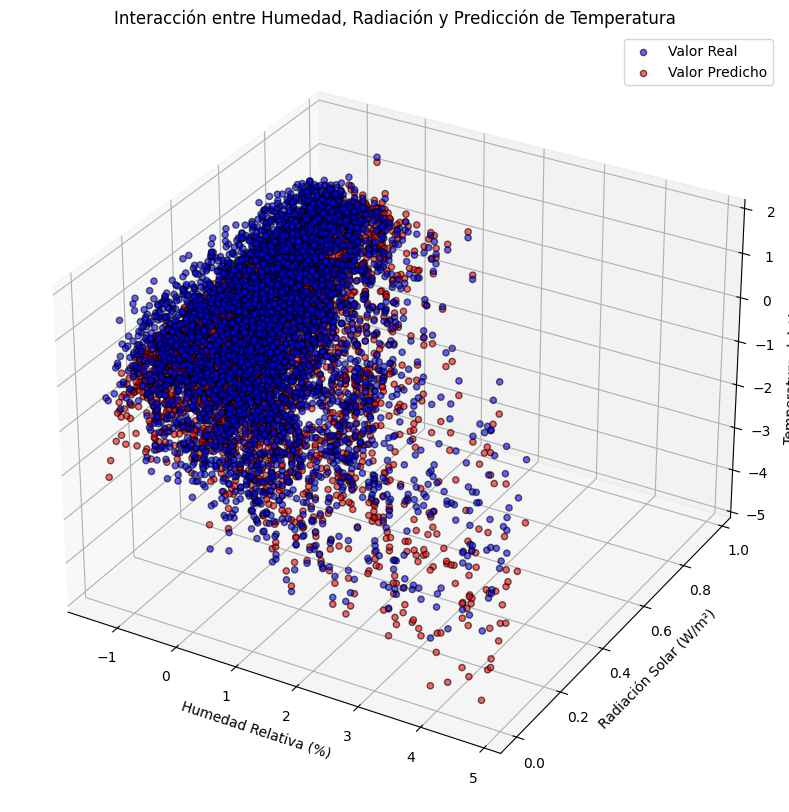

In [53]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test["HR (%)"], X_test["Rs(w/m)"], y_test, color='blue', alpha=0.6, label='Valor Real', edgecolor='k')
ax.scatter(X_test["HR (%)"], X_test["Rs(w/m)"], y_pred, color='red', alpha=0.6, label='Valor Predicho', edgecolor='k')
# HR (%)	Td form	Rs(w/m)
# Etiquetas del gráfico
ax.set_xlabel('Humedad Relativa (%)')
ax.set_ylabel('Radiación Solar (W/m²)')
ax.set_zlabel('Temperatura del Aire (°C)')
ax.set_title('Interacción entre Humedad, Radiación y Predicción de Temperatura')

plt.legend()
plt.show()

In [55]:
print(f"Bias: {model_n.intercept_}")
print(f"Coeficiente :{model_n.coef_}")

print(f"Bias no norm: {model.intercept_}")
print(f"Coeficiente no norm: {model.coef_}")

Bias: -0.12319183481706268
Coeficiente :[-0.95049146  0.9175954   0.32101565]
Bias no norm: 35.81089882948638
Coeficiente no norm: [-0.49418076  1.0595966   0.00193163]


In [56]:
coef = np.array(model_n.coef_)
bias = np.array(model_n.intercept_)

modelo_fx = lambda X: X.dot(coef) + bias

pred = modelo_fx(X_test)

print(pred.values)
print(model_n.predict(X_test))

[-1.12138341  0.27307912  0.57716722 ... -1.13564262 -0.48474773
  0.87289406]
[-1.12138341  0.27307912  0.57716722 ... -1.13564262 -0.48474773
  0.87289406]


In [65]:
np.random.seed(42)

index = np.random.randint(0, X_test.shape[0], 1)
print(index)

X_test.iloc[index]

[860]


,HR (%),Td form,Rs(w/m)
5464,-0.884659,-0.407664,0.278917


In [67]:
y_test.iloc[index]

5464    0.876862
Name: T Aire (C), dtype: float64

In [68]:
model_n.predict(X_test.iloc[index])

array([0.43313453])

In [69]:
model_n.predict(np.array([[0.5, 0.1, 0.2], [1, 1, 1]]))

c:\Users\07020\Dev\curso_ml\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.4424749 ,  0.16492776])